In [1830]:
# Importing necessary libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import scipy.special as sp
import csv

In [1831]:
# Get the data
df = pd.read_csv("Datafil.csv")

# 1 Warm-up
The following tasks are designed to familiarize you with the dataset and prepare the data for use when building your predictive models.

### (a) 
All scores in the dataframe are currently numbers between 0 and 10. Normalize these values in the dataframe so that they range between 0 and 1.


In [1832]:
def normalize_scores(df):
    # Normalize scores (from 6th column onwards)
    for col in df.columns[5:]:
        df[col] = df[col].apply(lambda x: x/10 if x == x else x)  # handle NaN values
    print(df)

In [1833]:
normalize_scores(df)

           id      location  month  year        comp  heat  run 1  run 2  \
0      Berger  jacksonville      7  2022  prelim men   0.1   0.50   0.11   
1        Papa  jacksonville      7  2022  prelim men   0.1   0.37   0.70   
2     Pudwill  jacksonville      7  2022  prelim men   0.1   0.20   0.13   
3      Shirai  jacksonville      7  2022  prelim men   0.1   0.79   0.70   
4        Mota  jacksonville      7  2022  prelim men   0.1   0.38   0.40   
..        ...           ...    ...   ...         ...   ...    ...    ...   
92      Hoban     las vegas     10  2022   final men   0.1   0.62   0.88   
93    Hoefler     las vegas     10  2022   final men   0.1   0.84   0.57   
94      Eaton     las vegas     10  2022   final men   0.1   0.69   0.72   
95     Joslin     las vegas     10  2022   final men   0.1   0.68   0.83   
96  Ribeiro G     las vegas     10  2022   final men   0.1   0.85   0.30   

    trick 1  trick 2  trick 3  trick 4  trick 5  trick 6  
0      0.70     0.00     0.7

### (b) 
Create a histogram for all trick scores for tricks 1-4. 
- What do you observe? 
- Is there a particular value that appears more often than the others? 
- If so, how does this value compare to the others?

In [1834]:
# b) here i create a histogram fr normalized data
def plot_histograms(datafile):
    # List of tricks
    tricks = ["trick 1", "trick 2", "trick 3", "trick 4"]

    # Plot histograms for each trick
    for idx, trick in enumerate(tricks, 1):
        plt.subplot(2, 2, idx)  # 2x2 grid of histograms
        plt.hist(df[trick].dropna(), bins=20, alpha=0.7, color='blue')  # dropna() ensures NaN values are ignored
        plt.title(f"Histogram of {trick}")
        plt.xlabel("Score")
        plt.ylabel("Frequency")

    # Adjust layout to prevent overlaps and show the plot
    plt.tight_layout()
    plt.show()

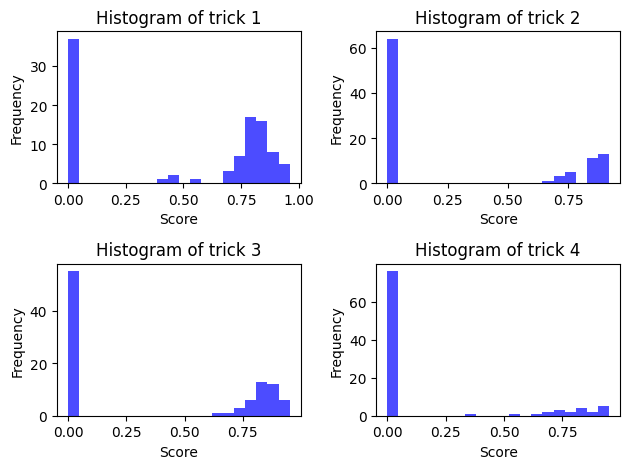

In [1835]:
plot_histograms(df)

*From our observations, the most common score for each trick is zero, by a significant margin. The majority of other scores fall within the 0.6 to 0.9 range, with a noticeable lack of scores between 0 and 0.6. This pattern suggests that contestants tend to attempt more challenging tricks, which typically result in either failure (yielding a score of zero) or a relatively high score. This behavior indicates a tendency to bypass tricks of easy to medium difficulty.*

### (c)
For each trick (1-4), create a new column named 'make i' for \(i=1,2,3,4\). The value of 'make i' in a given row should be 1 if the skateboarder successfully landed trick \(i\) and 0 otherwise.

In [1836]:
def add_make_columns(df):
    # Loop through each trick column
    for i in range(1, 5):
        trick_column = f"trick {i}"
        
        # Assuming a trick is executed if its score > 0
        df[f"make {i}"] = df[trick_column].apply(lambda x: 1 if x > 0 else 0)
    
    print(df)

In [1837]:
add_make_columns(df)

           id      location  month  year        comp  heat  run 1  run 2  \
0      Berger  jacksonville      7  2022  prelim men   0.1   0.50   0.11   
1        Papa  jacksonville      7  2022  prelim men   0.1   0.37   0.70   
2     Pudwill  jacksonville      7  2022  prelim men   0.1   0.20   0.13   
3      Shirai  jacksonville      7  2022  prelim men   0.1   0.79   0.70   
4        Mota  jacksonville      7  2022  prelim men   0.1   0.38   0.40   
..        ...           ...    ...   ...         ...   ...    ...    ...   
92      Hoban     las vegas     10  2022   final men   0.1   0.62   0.88   
93    Hoefler     las vegas     10  2022   final men   0.1   0.84   0.57   
94      Eaton     las vegas     10  2022   final men   0.1   0.69   0.72   
95     Joslin     las vegas     10  2022   final men   0.1   0.68   0.83   
96  Ribeiro G     las vegas     10  2022   final men   0.1   0.85   0.30   

    trick 1  trick 2  trick 3  trick 4  trick 5  trick 6  make 1  make 2  \
0      0.70

### (d)
For each skateboarder, estimate the probability that a trick receives a score greater than 0.6, given that the skateboarder successfully lands the trick. 
- What is the probability that the skateboarder fails to land a particular trick? 
- What observations can you make? Relate your findings to your observations in part (b).

In [1838]:
# d) Given that they make a trick estimate the probability of them getting a score that's higher than 0.6
def estimate_probabilities(df):
    # Here we group by skateboarder's name.
    # This is becouse I want to have only one row for each skateboarder.
    grouped_df = df.groupby('id')

    results = []

    for name, group in grouped_df:
        # Number of tricks successfully landed for all locations
        successful_tricks = group[[f"trick {i}" for i in range(1, 6)]].applymap(lambda x: 1 if x > 0 else 0).sum().sum()
        # For every element (score) in the trick columns, this applies a function that converts it to 1 if it's greater than 0.
        # Then it sums all the 1s in the dataframe.
        # Then it sums all the 1s in the resulting series.
        # This gives us the total number of tricks successfully landed for all locations.
        # Note that this is not the same as the total number of tricks successfully landed for each location.
        # For example, if a skateboarder landed 3 tricks in location 1 and 2 tricks in location 2, this will return 5.
        
        # Number of tricks with score >= 0.6 across all locations
        tricks_score_more_than_06 = group[[f"trick {i}" for i in range(1, 6)]].applymap(lambda x: 1 if x >= 0.6 else 0).sum().sum()
        # Same as above, but for tricks with score >= 0.6

        # Probability that a trick receives a score greater than 0.6 given the trick was landed
        prob_success_given_landed = tricks_score_more_than_06 / successful_tricks if successful_tricks > 0 else 0
        # If the skateboarder didn't land any tricks, we set the probability to 0.
        # Otherwise, we divide the number of tricks with score >= 0.6 by the total number of tricks successfully landed.
        # This gives us the probability that a trick receives a score greater than 0.6 given the trick was landed.
        
        # Probability that the skateboarder fails to land a trick
        total_tricks = group[[f"trick {i}" for i in range(1, 6)]].count().sum()
        failed_tricks = group[[f"trick {i}" for i in range(1, 6)]].applymap(lambda x: 1 if x == 0 else 0).sum().sum()
        prob_failure = failed_tricks / total_tricks
        # Same as above, but for tricks with score = 0.
        # This gives us the probability that the skateboarder fails to land a trick.
        # Note that this is not the same as the probability that the skateboarder fails to land a trick given the trick was landed.
        # For example, if a skateboarder landed 3 tricks in location 1 and 2 tricks in location 2, this will return 0.4.
        
        results.append((name, prob_success_given_landed, prob_failure))
    
    for name, success_given_landed, failure in results:
        print(f"Skateboarder {name}: P(Score > 0.6 | Landed) = {success_given_landed:.2f}, P(Failure) = {failure:.2f}")
    
#print(df)

In [1839]:
#Pleas note that this is for all tricks!
estimate_probabilities(df)

Skateboarder Berger: P(Score > 0.6 | Landed) = 1.00, P(Failure) = 0.83
Skateboarder Decenzo: P(Score > 0.6 | Landed) = 1.00, P(Failure) = 0.59
Skateboarder Eaton: P(Score > 0.6 | Landed) = 1.00, P(Failure) = 0.38
Skateboarder Foy: P(Score > 0.6 | Landed) = 1.00, P(Failure) = 0.50
Skateboarder Fynn: P(Score > 0.6 | Landed) = 1.00, P(Failure) = 0.50
Skateboarder Gustavo: P(Score > 0.6 | Landed) = 1.00, P(Failure) = 0.60
Skateboarder Hoban: P(Score > 0.6 | Landed) = 1.00, P(Failure) = 0.62
Skateboarder Hoefler: P(Score > 0.6 | Landed) = 1.00, P(Failure) = 0.59
Skateboarder Horigome: P(Score > 0.6 | Landed) = 1.00, P(Failure) = 0.50
Skateboarder Huston: P(Score > 0.6 | Landed) = 1.00, P(Failure) = 0.62
Skateboarder Jordan: P(Score > 0.6 | Landed) = 1.00, P(Failure) = 0.60
Skateboarder Joslin: P(Score > 0.6 | Landed) = 1.00, P(Failure) = 0.55
Skateboarder Majerus: P(Score > 0.6 | Landed) = 0.33, P(Failure) = 0.62
Skateboarder McClung: P(Score > 0.6 | Landed) = 0.00, P(Failure) = 0.75
Skateb

**Here, I will add a modified version of this code that handles each trick separately!**

In [1840]:
def estimate_probabilities_by_individual_trick(df):
    # Group by skateboarder's name to get each skateboarder's data across all locations
    grouped_df = df.groupby('id')

    results = []

    for name, group in grouped_df:
        for i in range(1, 6):  # Iterate through each trick
            trick_col = f"trick {i}"

            # Number of times this specific trick was landed by the skateboarder across all locations
            successful_tricks = group[trick_col].apply(lambda x: 1 if x > 0 else 0).sum()

            # Number of times this specific trick got a score >= 0.6 by the skateboarder across all locations
            tricks_score_more_than_06 = group[trick_col].apply(lambda x: 1 if x >= 0.6 else 0).sum()

            # Probability that this trick receives a score greater than 0.6 given the trick was landed
            prob_success_given_landed = tricks_score_more_than_06 / successful_tricks if successful_tricks > 0 else 0

            # Total attempts of this specific trick by the skateboarder across all locations
            total_tricks = group[trick_col].count()

            # Number of times this specific trick failed (scored 0) by the skateboarder across all locations
            failed_tricks = group[trick_col].apply(lambda x: 1 if x == 0 else 0).sum()

            # Probability that the skateboarder fails to land this trick
            prob_failure = failed_tricks / total_tricks

            results.append((name, trick_col, prob_success_given_landed, prob_failure))

    for name, trick, success_given_landed, failure in results:
        print(f"Skateboarder {name} for {trick}: P(Score > 0.6 | Landed) = {success_given_landed:.2f}, P(Failure) = {failure:.2f}")


In [1841]:
estimate_probabilities_by_individual_trick(df)

Skateboarder Berger for trick 1: P(Score > 0.6 | Landed) = 1.00, P(Failure) = 0.67
Skateboarder Berger for trick 2: P(Score > 0.6 | Landed) = 0.00, P(Failure) = 1.00
Skateboarder Berger for trick 3: P(Score > 0.6 | Landed) = 1.00, P(Failure) = 0.67
Skateboarder Berger for trick 4: P(Score > 0.6 | Landed) = 0.00, P(Failure) = 1.00
Skateboarder Berger for trick 5: P(Score > 0.6 | Landed) = 0.00, P(Failure) = nan
Skateboarder Decenzo for trick 1: P(Score > 0.6 | Landed) = 1.00, P(Failure) = 0.25
Skateboarder Decenzo for trick 2: P(Score > 0.6 | Landed) = 1.00, P(Failure) = 0.75
Skateboarder Decenzo for trick 3: P(Score > 0.6 | Landed) = 1.00, P(Failure) = 0.25
Skateboarder Decenzo for trick 4: P(Score > 0.6 | Landed) = 0.00, P(Failure) = 1.00
Skateboarder Decenzo for trick 5: P(Score > 0.6 | Landed) = 0.00, P(Failure) = 1.00
Skateboarder Eaton for trick 1: P(Score > 0.6 | Landed) = 1.00, P(Failure) = 0.50
Skateboarder Eaton for trick 2: P(Score > 0.6 | Landed) = 1.00, P(Failure) = 0.00
Sk

C:\Users\villi\AppData\Local\Temp\ipykernel_13848\417097349.py:27: RuntimeWarning: invalid value encountered in longlong_scalars
  prob_failure = failed_tricks / total_tricks


### (e) 
Create a scatter plot for run score 1 versus run score 2. 

- Do you see any clear correlation from the diagram?

In [1842]:
import pandas as pd

def estimate_probabilities_by_individual_trick_row(df):
    # Group by skateboarder's name to get each skateboarder's data across all locations
    grouped_df = df.groupby('id')

    # Create a dictionary to store results
    results_dict = {}

    for name, group in grouped_df:
        # Create a sub-dictionary for each skateboarder
        skateboarder_data = {}
        
        for i in range(1, 6):  # Iterate through each trick
            trick_col = f"trick {i}"

            # Number of times this specific trick was landed by the skateboarder across all locations
            successful_tricks = group[trick_col].apply(lambda x: 1 if x > 0 else 0).sum()

            # Number of times this specific trick got a score >= 0.6 by the skateboarder across all locations
            tricks_score_more_than_06 = group[trick_col].apply(lambda x: 1 if x >= 0.6 else 0).sum()

            # Probability that this trick receives a score greater than 0.6 given the trick was landed
            prob_success_given_landed = tricks_score_more_than_06 / successful_tricks if successful_tricks > 0 else 0

            # Total attempts of this specific trick by the skateboarder across all locations
            total_tricks = group[trick_col].count()

            # Number of times this specific trick failed (scored 0) by the skateboarder across all locations
            failed_tricks = group[trick_col].apply(lambda x: 1 if x == 0 else 0).sum()

            # Probability that the skateboarder fails to land this trick
            prob_failure = failed_tricks / total_tricks

            # Store the results in the sub-dictionary
            skateboarder_data[f"{trick_col} P(Score > 0.6 | Landed)"] = prob_success_given_landed
            skateboarder_data[f"{trick_col} P(Failure)"] = prob_failure
        
        # Add the sub-dictionary to the main dictionary with skateboarder's name as the key
        results_dict[name] = skateboarder_data

    # Convert the dictionary to a DataFrame and return it
    results_df = pd.DataFrame.from_dict(results_dict, orient='index')
    return results_df

# Assuming you have a dataframe `df`
# You can call the function and get the results in a DataFrame format
# results_df = estimate_probabilities_by_individual_trick(df)
# print(results_df)


In [1843]:
print(estimate_probabilities_by_individual_trick_row(df))

           trick 1 P(Score > 0.6 | Landed)  trick 1 P(Failure)  \
Berger                                 1.0            0.666667   
Decenzo                                1.0            0.250000   
Eaton                                  1.0            0.500000   
Foy                                    1.0            0.333333   
Fynn                                   1.0            0.666667   
Gustavo                                1.0            0.200000   
Hoban                                  1.0            0.200000   
Hoefler                                1.0            0.250000   
Horigome                               1.0            0.000000   
Huston                                 1.0            0.500000   
Jordan                                 1.0            0.600000   
Joslin                                 1.0            0.400000   
Majerus                                0.5            0.000000   
McClung                                0.0            0.000000   
Midler    

C:\Users\villi\AppData\Local\Temp\ipykernel_13848\803681420.py:33: RuntimeWarning: invalid value encountered in longlong_scalars
  prob_failure = failed_tricks / total_tricks


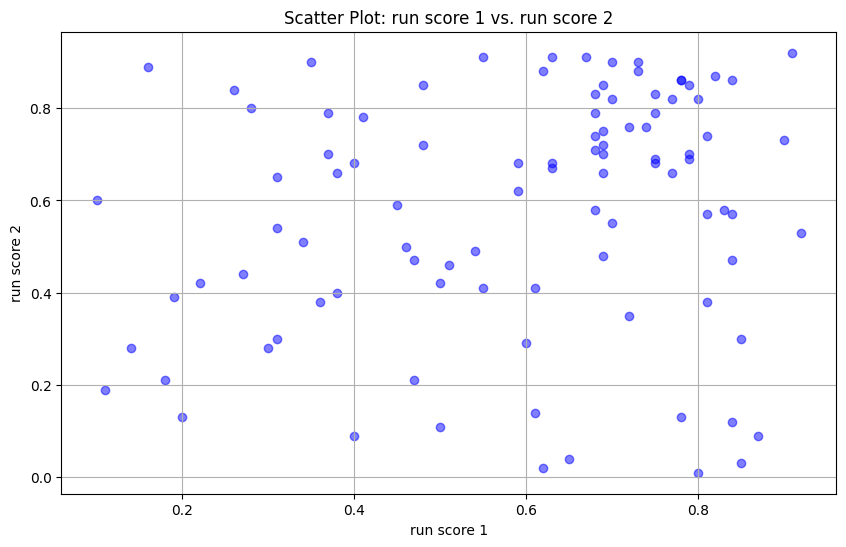

In [1844]:
# Extracting data for plotting
x = df['run 1']
y = df['run 2']

# Creating the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue', alpha=0.5)
plt.title('Scatter Plot: run score 1 vs. run score 2')
plt.xlabel('run score 1')
plt.ylabel('run score 2')
plt.grid(True)

# Display the plot
plt.show()

# 2 A Frequentist Model
We'd like to construct a model that can predict which of the 16 skateboarders in the LCQ will secure a spot in the final. 

One approach to this is to construct a model for each skateboarder, utilize these models to simulate run scores and trick scores for every skateboarder, and then combine these simulations to simulate the LCQ as a whole. 

By simulating multiple LCQs, we can extract the top four skateboarders with the highest cumulative scores from each. 
Our prediction would then be the mode of these outcomes. 

**NOTE:** *Please note that this model assumes that the performances of the skateboarders are independent. For the sake of simplicity, we'll assume that the score for a particular run $Y_i$ and the score for a specific trick $X_i$ are independent for each skateboarder.*

- For skateboarder $i$, we assume that all trick scores and run scores are independent and have identically distributed outcomes from $X_i$ and $Y_i$ respectively. 

- We can start by specifying a model for $X_i$ and $Y_i$. 

---

From the observations in Task 1, a plausible model for $X_i$ is the following:
$$
X_i = 
\begin{cases} 
0 & \text{if } V_i = 0, \\ 
Z_i & \text{if } V_i = 1,
\end{cases}
$$
where 
$$ V_i \sim \text{Ber}(\theta_i), $$
$$ Z_i \sim \text{Beta}(\alpha_i, \beta_i) $$
and 
$$ V_i \perp Z_i. $$
It can be shown that
$$ 
f_{X_i}(x_i | \theta_i, \alpha_i, \beta_i) = (1-\theta_i) \mathbb{1}_{\{x_i=0\}} + \theta_i f_{Z_i}(z_i).
$$
The choice $ V_i \sim \text{Ber}(\theta_i) $ models the fact that a skateboarder receives a score of 0 if and only if they do not successfully land the trick. Meanwhile, the choice $ Z_i \sim \text{Beta}(\alpha_i, \beta_i) $ models that the score for a particular trick represents the portion of the trick that was "perfect."

### (a) 
Provide a point estimate for each $\theta_i$, the probability that skateboarder $i$ lands a trick.

***ANSWER:*** 

https://en.wikipedia.org/wiki/Bernoulli_distribution

---



We can attempt a ML point estimation for $\theta_i$ since we know that $V_i$ follows a Bernoulli distribution with parameter $\theta_i$.

$$ V_i \sim \text{Ber}(\theta_i) $$
$$
f_{V_i}\left(\theta_i\right)=\theta_i^{v_i}\left(1-\theta_i\right)^{1-v_1}
$$

*Note: Parameter $\theta_i$ for $\text{Ber}(\theta_i)$ has to be $\theta_i \in[0,1]$ we lake this since we normalized the scores.*

$$
\log L\left(\theta \mid v_j\right)=\log \prod_i^n \theta_i^{v_i}(1-\theta_i)^{1-v_i}=
$$
$$
=\sum_{k=1}^n \log \theta_i^{v_k}(1-\theta_i)^{1-x_k}=\sum_{k=1}^n \log \theta_i^{v_k}+\sum_{k=1}^n \log \left(1-\theta_i\right)^{1-v_k}=
$$
$$
=\log \theta_i \cdot \sum_{k=1} V_k+\log \left(1-\theta_i\right) \sum\left(1-V_k\right)
$$

*We can now attmpt to take a derivative.*

$$
L^{\prime}\left(\theta_i \mid v\right)=\frac{\sum V_k}{\theta_i}-\frac{1}{1-\theta_i}\sum_{k=1}^n\left(1-v_k\right)=\frac{\sum_{k=1}^n v_k}{\theta_i}-\frac{\left(n-\sum_{k=1}^n v_k\right)}{1-\theta_i}
$$

*To find the critical point we set $L^{\prime}\left(\theta_i \mid v\right)=0$*
$$
\frac{\sum_{k=1}^n v_k}{\theta_i}-\frac{\left(n-\sum_{k=1}^n v_k\right)}{1-\theta_i}=0
$$

$$
\frac{\sum_{k=1}^n v_k}{\theta_i}-\frac{\left(n-\sum_{k=1}^n v_k\right)}{1-\theta_i}=0
$$

$$
\frac{\sum_{k=1}^n v_k}{\theta_i}=\frac{\left(n-\sum_{k=1}^n v_k\right)}{1-\theta_i}
$$

$$
\sum_{k=1}^n v_k-\theta_i \sum_{k=1}^n v_k=\theta_i n-\theta_i\sum_{k=1}^nv_k
$$

$$
\sum_{k=1}^n v_k=\theta_i n
$$

$$
\theta_i=\frac{\sum_{k=1}^n v_k}{n}
$$

***We can see that this is just a sample mean.***

---

In [1845]:
# Extracting data for plotting
make_columns = ['make 1', 'make 2', 'make 3', 'make 4']

df['total_made'] = df[make_columns].sum(axis=1)
df['total_attempted'] = df[['trick 1', 'trick 2', 'trick 3', 'trick 4']].notna().sum(axis=1)
df['theta_i'] = df['total_made'] / df['total_attempted']

#print(df)

print(df[['id', 'theta_i']])



           id  theta_i
0      Berger     0.50
1        Papa     0.75
2     Pudwill     0.00
3      Shirai     0.50
4        Mota     0.25
..        ...      ...
92      Hoban     0.50
93    Hoefler     0.50
94      Eaton     0.50
95     Joslin     0.50
96  Ribeiro G     0.75

[97 rows x 2 columns]


Okay, now I have $\theta_i$ for each skateboarder at each location, but it would be nice to have just one $\theta_i$ for each name.

- Can i take and average of $\theta_i$ to reresent the $\theta_{itotal}$ for a specific skateboarder id?

Concerns I have:

-  Lose of information about the variability of $\theta_i$.
-  Each skateborder has an equal number of attempts at each location so its no weighted to favor one location.
-  If the distribution of $\theta_i$ values for a skateboarder is skewed, then the mean might not be the most representative measure. In that case, I would want to do median or mode...

I'm I second year bachelors student and dont know any better, let's do it...

In [1846]:
# Group by 'id' and compute the mean of theta_i for each skateboarder
theta_average = df.groupby('id')['theta_i'].mean().reset_index()

# Rename the columns for clarity
theta_average.columns = ['id', 'theta_average']

# Print the results
print(theta_average)

#Okay, that's great! 
# Now I have this information, but I would like to save it into the main DataFrame file.
# Merge the theta_average DataFrame with the original df on 'id'
df = df.merge(theta_average, on='id', how='left')

# Now the original df has an additional column 'theta_average'
#print(df)

           id  theta_average
0      Berger       0.166667
1     Decenzo       0.437500
2       Eaton       0.625000
3         Foy       0.500000
4        Fynn       0.500000
5     Gustavo       0.400000
6       Hoban       0.400000
7     Hoefler       0.437500
8    Horigome       0.562500
9      Huston       0.375000
10     Jordan       0.400000
11     Joslin       0.450000
12    Majerus       0.375000
13    McClung       0.250000
14     Midler       0.333333
15      Milou       0.450000
16       Mota       0.250000
17   Oliveira       0.416667
18    O’neill       0.250000
19       Papa       0.437500
20    Pudwill       0.250000
21  Ribeiro C       0.250000
22  Ribeiro G       0.541667
23  Rodriguez       0.500000
24   Santiago       0.083333
25     Shirai       0.400000
26     Silvas       0.375000
27      Suciu       0.625000
28       Wair       0.500000
29     Wright       0.250000


Okay, that's great! Now I have this information, but I would like to save it into the main DataFrame file so that I have it with me at all times.

In [1847]:
#print(df)

***It's hard for me to see exactly what I'm doing, so I want to create a separate file named Datafile_Frequentist.csv***

In [1848]:
# Round all float columns to 5 decimal places
df = df.round(5)

df.to_csv("Datafile_Frequentist.csv", index=False)

### (b) 
Provide a point estimate for the parameters $\left[\alpha_i, \beta_i\right]^{\mathrm{T}}$ for each skateboarder $i$. 

- Are there skateboarders for whom your chosen point estimate does not exist? If so, suggest an alternative point estimate for these $\theta_i$. 
- Justify your choices of point estimates.


***ANSWER:***

https://en.wikipedia.org/wiki/Gamma_distribution

https://en.wikipedia.org/wiki/Beta_distribution

---

For the Beta distribution:
$$
f\left(z_i \mid \alpha_i, \beta_i\right)=\frac{z_i^{\alpha_i-1}\left(1-z_i\right)^{\beta_i-1}}{B\left(\alpha_i, \beta_i\right)}
$$
where $B\left(\alpha_i, \beta_i\right)$ is the beta function, which acts as a normalization constant.

From the provided data, we have scores for each trick when it's not zero. 
To estimate $\alpha_i$ and $\beta_i$, we can make use of the mean and variance properties of the Beta distribution.

- Mean: $\mu=\frac{\alpha_i}{\alpha_i+\beta_i}$
- Variance: $\sigma^2=\frac{\alpha_i \beta_i}{\left(\alpha_i+\beta_i\right)^2\left(\alpha_i+\beta_i+1\right)}$

*However I think this might be a naive idea. Also i dont know the variance...*

---

We can write:
$$
f\left(x_i \mid \alpha, \beta, V_i=1\right) = f\left(z_i \mid \alpha, \beta\right) = L\left(\alpha, \beta \mid V_i=1, X_i=x_i\right)
$$

Lets rewrite the $\mathrm{B}(\alpha, \beta)$ function:


$$
\mathrm{B}(\alpha, \beta)=\frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha+\beta)}
$$

Now let's do the only thing we, God willing, know how to do: a ML point estimation.

$$
f_z(z \mid \alpha, \beta)=\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha) \Gamma(\beta)} z^{\alpha-1}(1-z)^{\beta-1}
$$

$$
\log L(\alpha, \beta \mid z)=\log \prod_{i=1}^n\left(\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha) \Gamma(\beta)} z_i^{\alpha-1}\left(1-z_i\right)^{\beta-1}\right)
$$

$$
=n \log \left(\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha) \Gamma(\beta)}\right)+(\alpha-1) \sum_i^n \log z_i+(\beta-1) \sum_{i=1}^n \log \left(1-z_i\right)
$$

We take derivatives with respect to $\alpha$ and $\beta$.

For the first term, using the properties of logarithms and the derivative of the Gamma function, $\psi(z)=\frac{d}{d z} \log \Gamma(z)$, this we found online...

$$
\frac{\partial L}{\partial \alpha}=n \psi(\alpha+\beta)-n \psi(\alpha)+\sum_{i=1}^n \log z_i
$$

$$
\frac{\partial L}{\partial \beta}=n \psi(\alpha+\beta)-n \psi(B)+\sum_i^n \log \left(1-z_i\right)
$$

We know that the $\psi(z)$ function is:

$$
\psi(z)=\frac{d}{d z} \log \Gamma(z)
$$

*I guess this is the equivalent of running headfirst into a wall...*


---

*Let's do gradient descent and try to solve it numerically.*

Basic game plan:

1. ***Initialization:*** We choose initial values for $\alpha$ and $\beta$ at random or choose something sensible via prior knowledge.

2. ***Compute Gradient:*** At each iteration, we compute the gradient of the log-likelihood function with respect to $\alpha$ and $\beta$.
$$
\frac{\partial L}{\partial \alpha} \text { and } \frac{\partial L}{\partial \beta}
$$
3. ***Update Parameters:*** Update $\alpha$ and $\beta$ using the gradients:
Where $\eta$ is the learning rate. It's a hyperparameter that you'll need to set. A smaller value will make the optimization more stable but slower, while a larger value will speed up the optimization but can make it overshoot or even diverge.
$$
\begin{aligned}
& \alpha=\alpha+\eta \frac{\partial L}{\partial \alpha} \\
& \beta=\beta+\eta \frac{\partial L}{\partial \beta}
\end{aligned}
$$


4. ***Convergence Check***: Repeat steps 2 and 3 until we get change in the log-likelihood between iterations is below a predetermined threshold, or until a set number of iterations is reached.

5. ***Output***: Once convergence is achieved, the values of $\alpha$ and $\beta$ are your MLEs.

6.  ***Invoke the name of Olof***: This will remind you of how this is simmilar to what we did in SF1550.

***First we know:***
$$
X_i = 
\begin{cases} 
0 & \text{if } V_i = 0, \\ 
Z_i & \text{if } V_i = 1,
\end{cases}
$$
where 
$$ Z_i \sim \text{Beta}(\alpha_i, \beta_i) $$
and 
$$ V_i \perp Z_i $$

1. The first step is to gather all the data for each skateboarder where the trick was not zero.


In [1849]:
def aggregate_tricks(tricks):
    # This function aggregates the tricks by filtering out zero values
    return list(tricks[tricks != 0])

# Assuming the tricks are stored in columns named 'trick 1', 'trick 2', etc.
trick_columns = ['trick 1', 'trick 2', 'trick 3', 'trick 4']  # Add more columns if needed

# Group by 'id' and aggregate tricks for each skateboarder
all_tricks_df = df.melt(id_vars='id', value_vars=trick_columns)\
                  .groupby('id')['value']\
                  .agg(aggregate_tricks)\
                  .reset_index()

# Rename the columns for clarity
all_tricks_df.columns = ['id', 'tricks']

# Print the result
print(all_tricks_df)

           id                                             tricks
0      Berger                                        [0.7, 0.76]
1     Decenzo         [0.78, 0.86, 0.87, 0.86, 0.78, 0.93, 0.71]
2       Eaton                     [0.75, 0.84, 0.84, 0.77, 0.75]
3         Foy                  [0.8, 0.79, 0.83, 0.9, 0.88, 0.9]
4        Fynn                [0.88, 0.9, 0.76, 0.74, 0.86, 0.82]
5     Gustavo     [0.83, 0.77, 0.8, 0.8, 0.74, 0.83, 0.88, 0.76]
6       Hoban   [0.82, 0.91, 0.86, 0.86, 0.92, 0.89, 0.88, 0.88]
7     Hoefler         [0.85, 0.73, 0.78, 0.67, 0.78, 0.87, 0.75]
8    Horigome  [0.88, 0.95, 0.87, 0.95, 0.84, 0.95, 0.83, 0.9...
9      Huston                                 [0.86, 0.88, 0.92]
10     Jordan       [0.84, 0.9, 0.88, 0.9, 0.9, 0.7, 0.88, 0.91]
11     Joslin  [0.84, 0.81, 0.79, 0.85, 0.85, 0.86, 0.83, 0.8...
12    Majerus                                  [0.79, 0.4, 0.36]
13    McClung                                             [0.45]
14     Midler            

2. Now that we have the data for each skateboarder, we can begin assessing their performance.

In [1850]:

def gradient(alpha_beta, data):
    alpha, beta = alpha_beta
    n = len(data)
    
    psi_alpha_plus_beta = sp.psi(alpha + beta)
    psi_alpha = sp.psi(alpha)
    psi_beta = sp.psi(beta)
    
    grad_alpha = n * psi_alpha_plus_beta - n * psi_alpha + np.sum(np.log(data))
    grad_beta = n * psi_alpha_plus_beta - n * psi_beta + np.sum(np.log(1 - data))
    
    return np.array([grad_alpha, grad_beta])

$$
\theta_{k+1}=\theta_k-n_k f^{\prime}\left(\theta_k\right)
$$

In [1851]:
def graddes(initialization, stepsize, num_iter, data):
    thetas = [initialization]
    
    for i in range(num_iter):
        #thetas.append(thetas[-1] - stepsize * gradient(thetas[-1], data))
        thetas = thetas + [thetas[-1] - (stepsize)*gradient(thetas[-1], data)]
        
    return thetas

In [1852]:
def gradient_method(samps):
    alpha_init = samps.mean()
    beta_init = samps.std()
    
    initialization = np.array([alpha_init, beta_init])
    #Ghas a t
    G = graddes(initialization, 0.001, 1000, samps)
    Garray = np.array([list(x) for x in G])
    plt.plot(Garray[:,0], Garray[:,1], 'o-r', markersize = 3)
    plt.xlabel('$α_k$', fontsize=14)
    plt.ylabel('$β_k$', fontsize=14)
    plt.show()
    
    return G

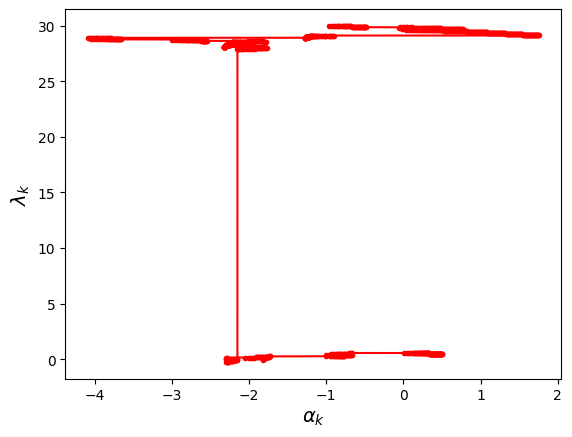

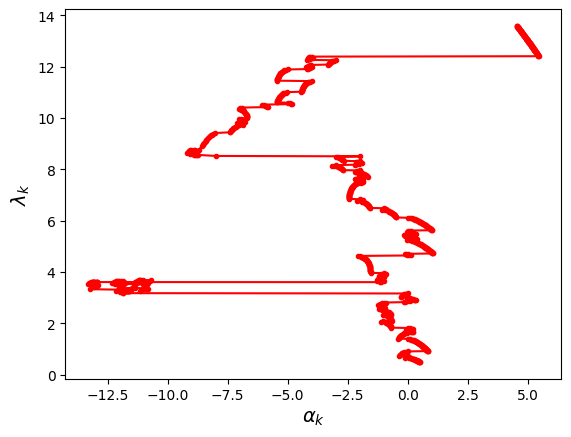

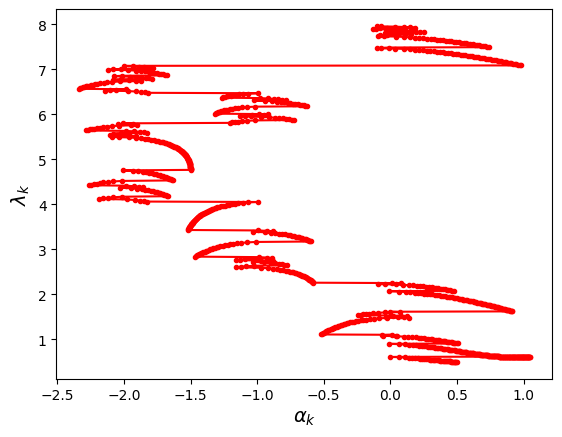

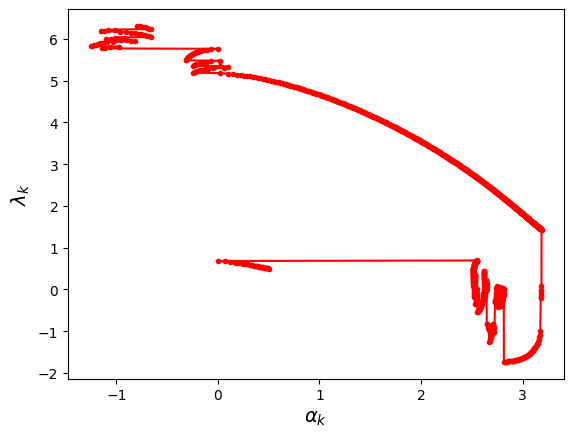

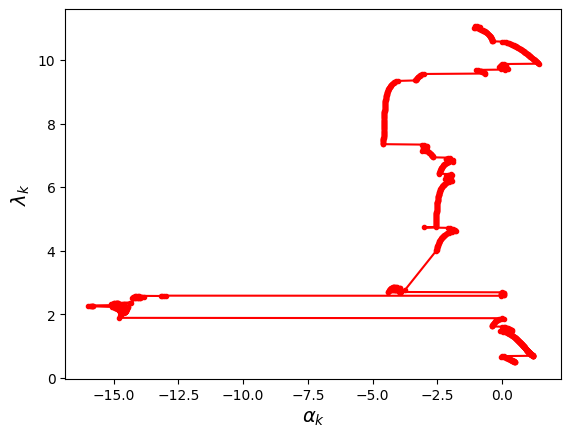

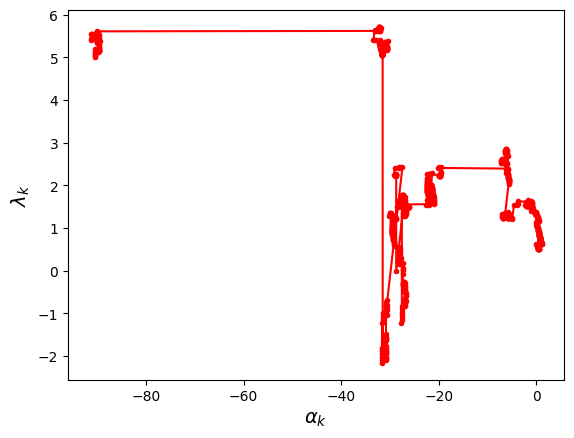

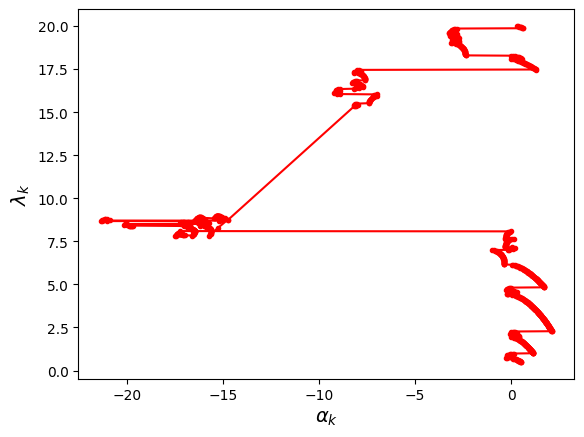

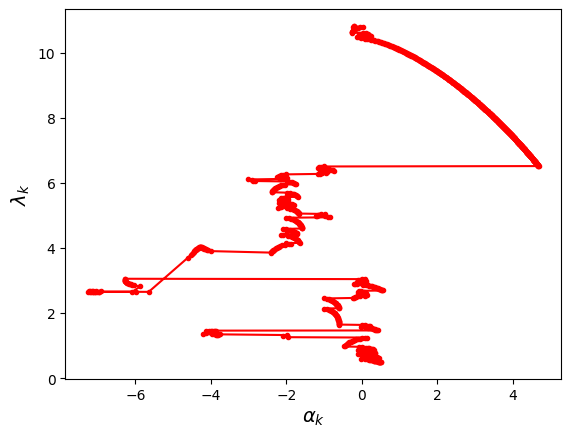

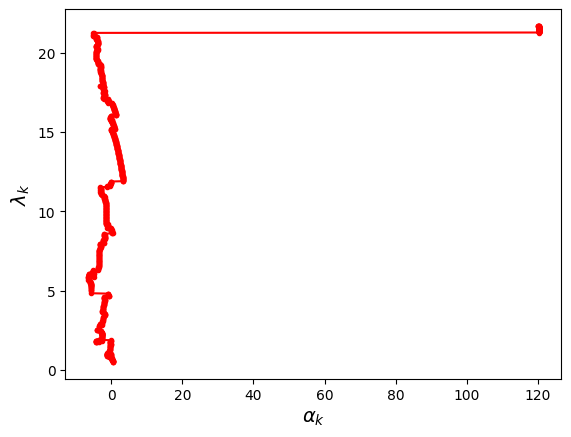

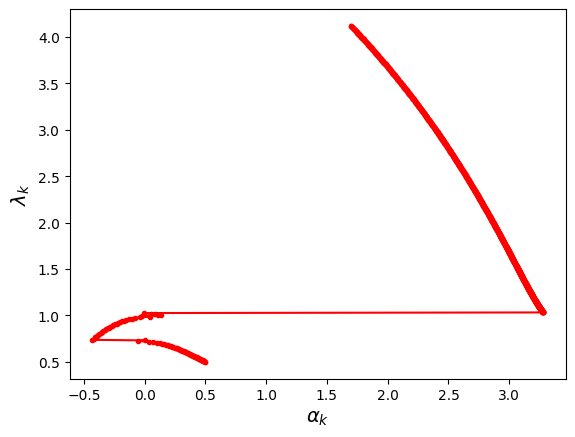

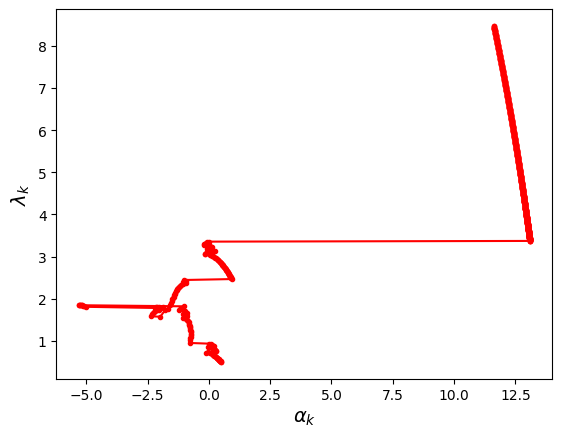

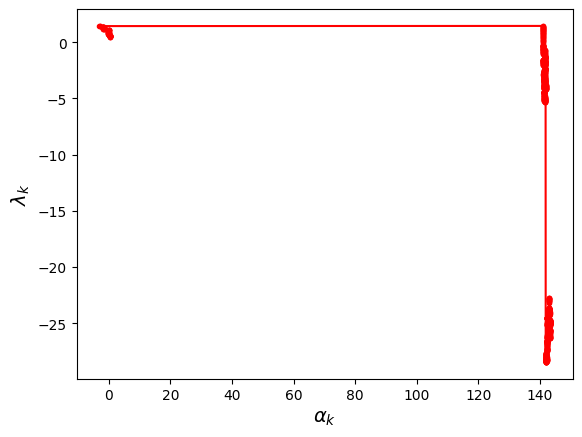

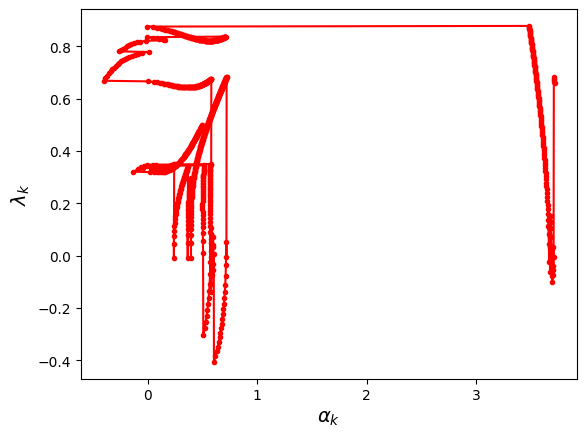

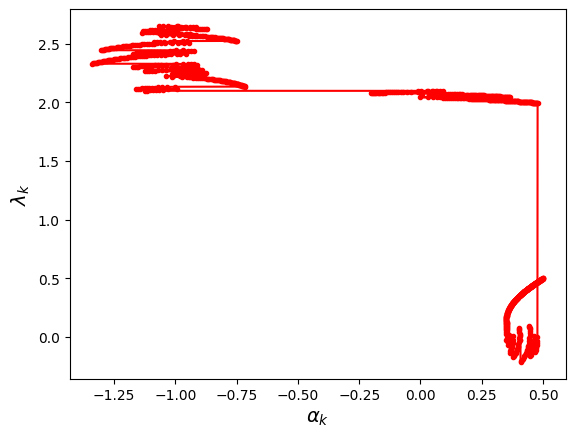

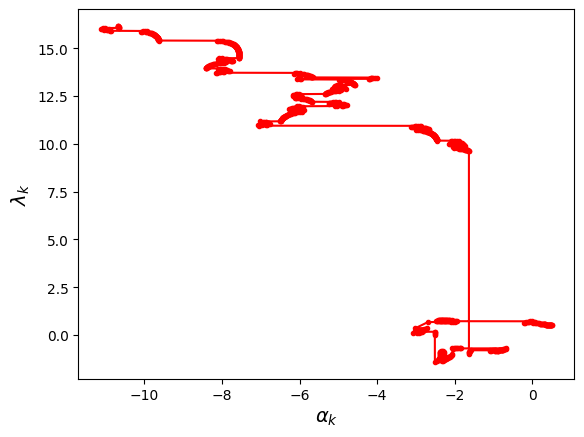

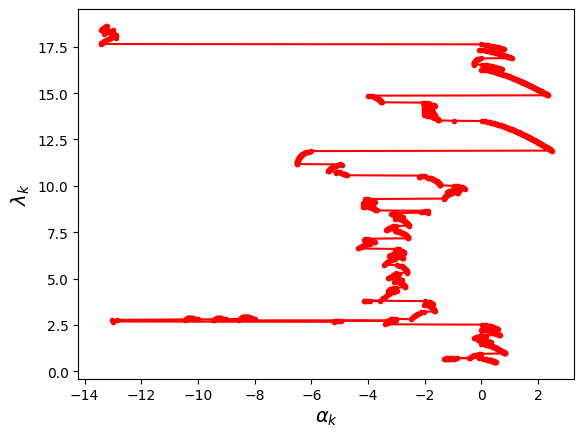

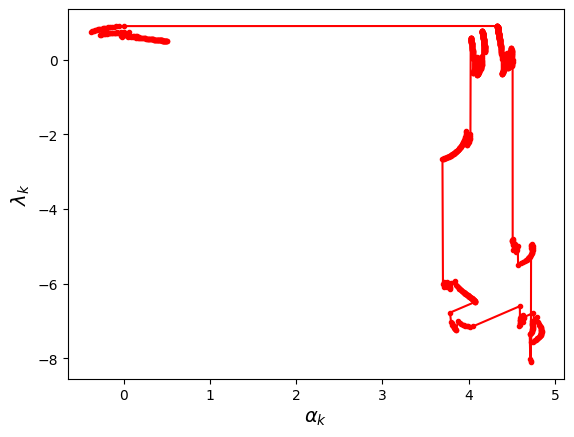

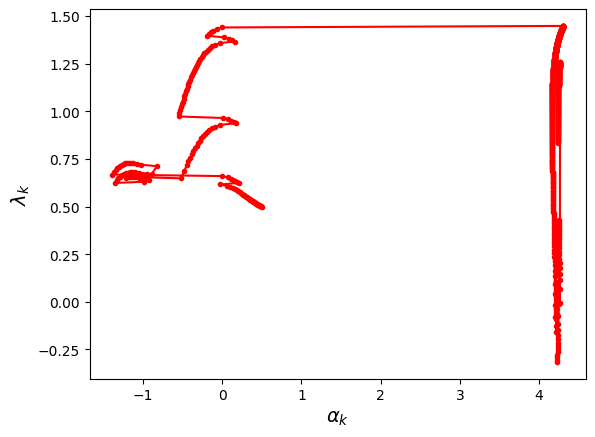

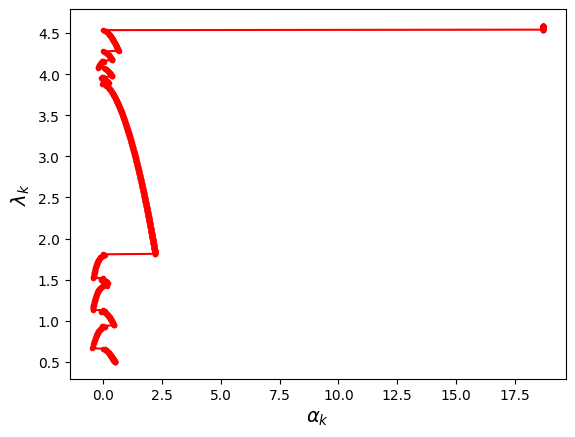

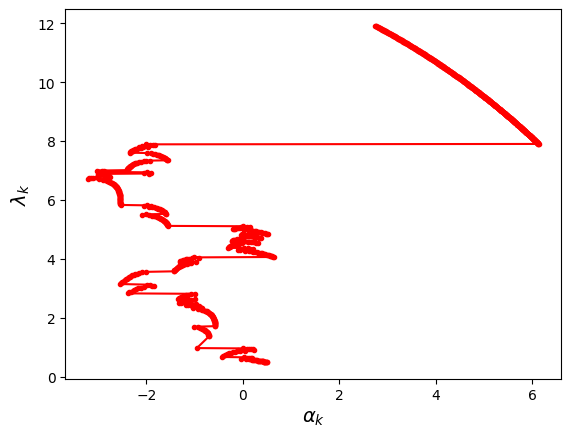

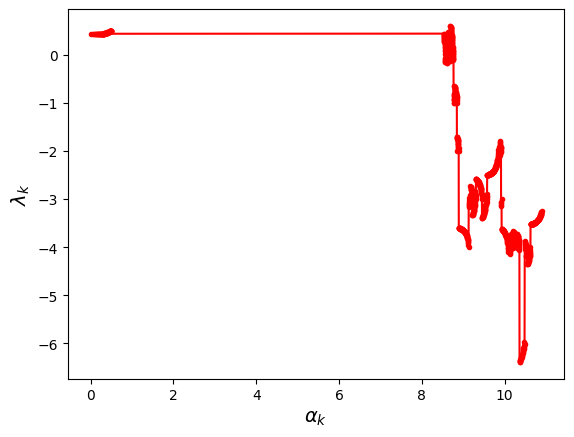

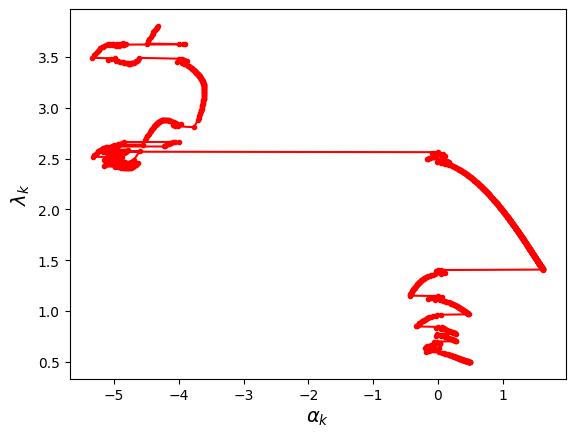

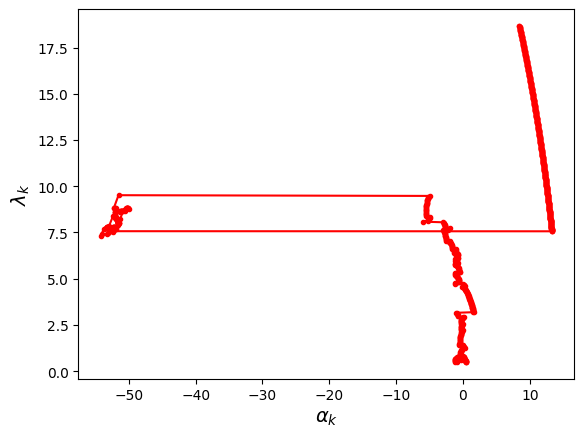

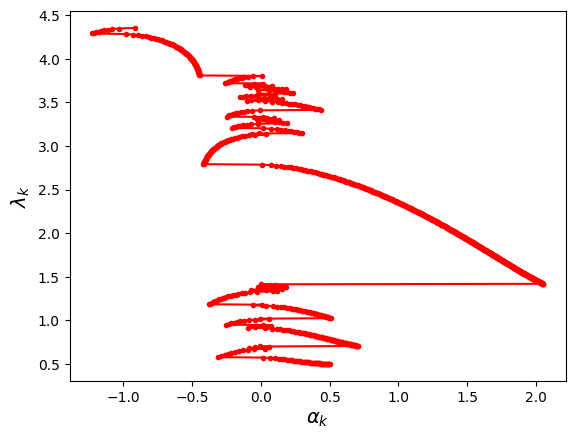

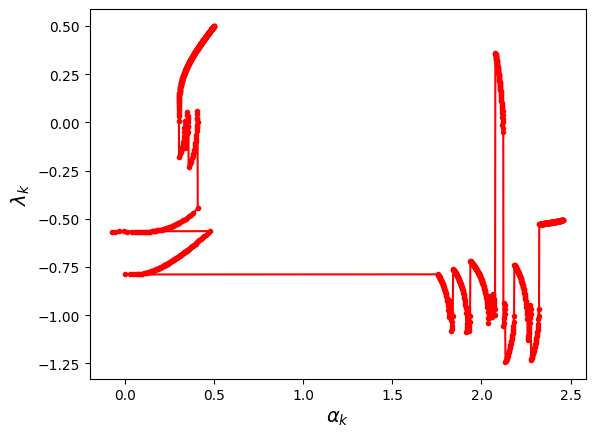

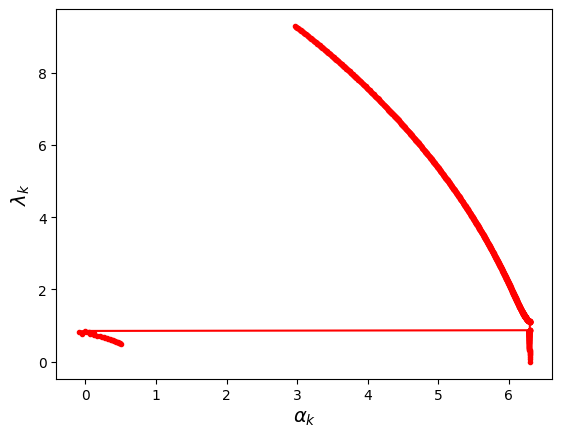

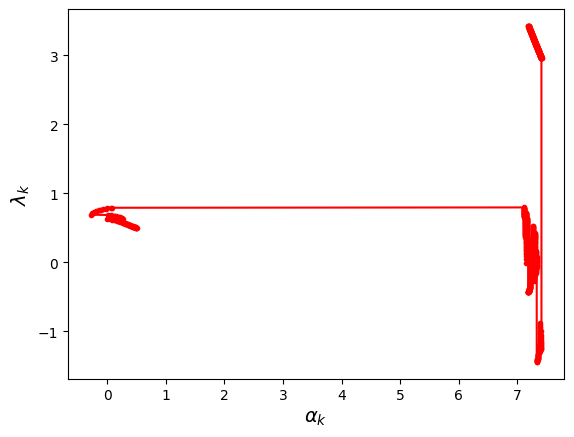

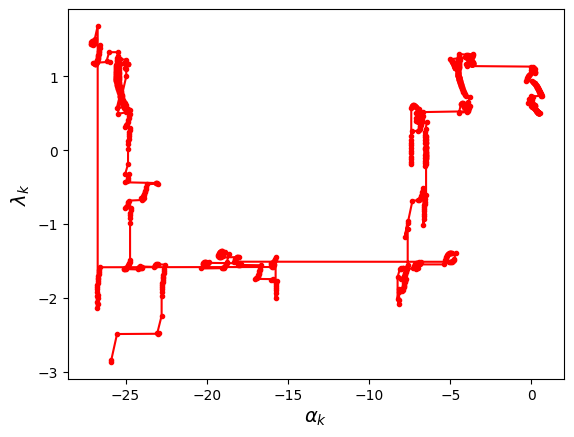

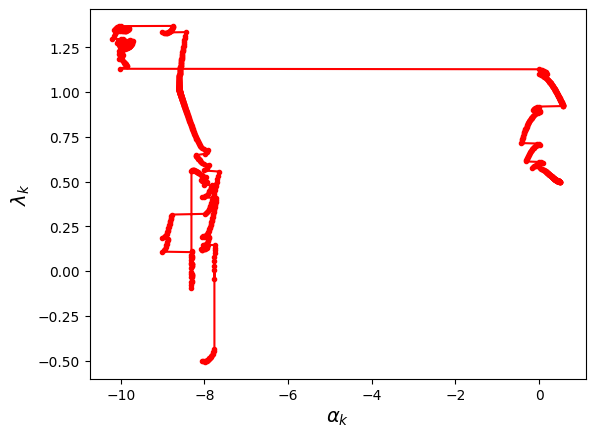

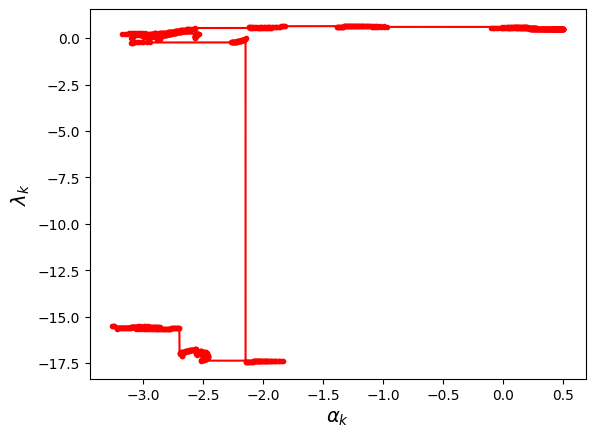

30


In [1853]:
results=[]
for index, row in all_tricks_df.iterrows():
    samps = np.array(row['tricks'])
    alpha_beta = gradient_method(samps)
    results.append(alpha_beta[-1])

print(len(results))


In [1854]:
df['alpha'] = df['alpha'].round(5)
df['beta'] = df['beta'].round(5)

file_path = 'Datafile_frequentist.csv'
df.to_csv(file_path, index=False)

KeyError: 'alpha'

(array([1., 0., 5., 5., 7., 4., 6., 6., 3., 3.]),
 array([0.34254414, 0.38078038, 0.41901661, 0.45725285, 0.49548908,
        0.53372532, 0.57196155, 0.61019779, 0.64843402, 0.68667026,
        0.72490649]),
 <BarContainer object of 10 artists>)

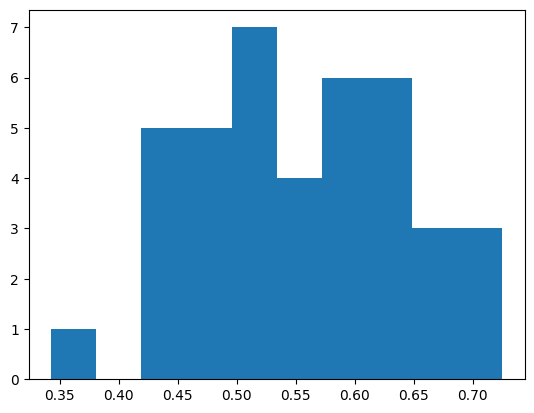

In [ ]:
samps = stats.beta.rvs(size = 40, a = 21, b=16, scale = 1)
plt.hist(samps)

### (c) 
Propose a model for $Y_i$ and provide a point estimate for the parameters of your model. 
- Justify your choices for the model and point estimate.

In [ ]:
#Code

Answer

### (d) 
Use your model for $[X_i, Y_i]^T$ to simulate $5000$ LCQs and for each simulation extract the four skateboarders $\mathbf{W} = [W_1, W_2, W_3, W_4]^T$ with the highest total scores. 
- What is the mode for $W_1, \ldots, W_{5000}$? 

The actual winners for the LCQ are Gustavo, Hoban, Eaton, and Decenzo. 

- How many of the actual winners are predicted by the mode? 
- What is the estimated probability of the actual winners based on your simulations? By the mode?

In [ ]:
#Code

Answer

### 3. Bayesian Model

As an alternative to the frequentist model developed in Task 2, we can consider a Bayesian model.

### (a) 
Propose a joint prior distribution for the parameters $[\Theta_i, A_i, B_i]^T$ for $X_i$ where we assume $\Theta_i \perp A_i, B_i$ for all $i$. 

- Justify your choice.


In [ ]:
#Code

Answer

### (b) 
Generate 5000 random samples from the posterior distribution
$$
f_{\theta_i, \alpha_i, \beta_i | \boldsymbol{X}_i}(\theta_i, \alpha_i, \beta_i | \boldsymbol{x}_i) .
$$
Plot your resulting samples for the marginal posterior distributions:
$$
f_{\theta_i | \boldsymbol{X}_i}(\theta_i | \boldsymbol{x}_i) \quad \text{and} \quad f_{\alpha_i, \beta_i | \boldsymbol{X}_i}(\alpha_i, \beta_i | \boldsymbol{x}_i) .
$$
Calculate the posterior sample mean and the posterior sample variance for each parameter $ \theta_i, \alpha_i $, and $ \beta_i $ for all skateboarders.

In [ ]:
#Code

Answer

### (c) 
- Propose a (joint) prior distribution for the parameters of your model $Y_i$ from task $2(c)$ and justify your choice. 

- You can assume that the model's parameters for skateboarder $i$ are independent of all other parameters including $\theta_i$, $\alpha_i$, and $\beta_i$. 

- Generate 5000 samples from the posterior distribution (make sure to save these samples!) and create a scatter plot of the results. 

- What is the sample mean and sample variance for each of your parameters based on your outcomes?

In [ ]:
#Code

Answer

### (d) 
Use your Bayesian model for $[X_i, Y_i]^T$ to simulate 5000 LCQs by drawing samples from the appropriate posterior predictive distributions. 

- What is the mode of your outcomes $W_1, \ldots, W_{5000}$? 

- How many of the real winners are predicted? 

- What is the estimated probability of the real winners based on your samples? 

- And by the mode?

In [ ]:
#Code

Answer

### (e) 
In the model in task $3(\mathrm{d})$, we assumed that the parameters $\Upsilon_i$ for $Y_i$ and the parameters $\Theta_i = [\Theta_i, A_i, B_i]^T$ for $X_i$ are independent given the data. 

- Why?

Answer

At the same time, we did not assume that $\Theta_i \perp A_i, B_i$ are independent given the data. 

1. Let $X_i^{(1)}, X_i^{(2)}, X_i^{(3)}, X_i^{(4)}$ denote skateboarder $i$'s four trick scores.
2. Let $Y_i^{(1)}, Y_i^{(2)}$ denote skateboarder $i$'s two run scores.
3. Let $O_i$ denote their total score. 

- Draw a directed acyclic graph with as few edges as possible so that the joint distribution of $O_i, X_i^{(1)}, X_i^{(2)}, X_i^{(3)}, X_i^{(4)}, Y_i^{(1)}, Y_i^{(2)}, \Theta_i, A_i, B_i$ and $\Upsilon$ is Markov with respect to it. 

Answer


- Based on your graph, can you conclude that the marginal posterior distribution for $\Theta_i, A_i$, and $B_i$ factorizes as:
$$
f_{\theta_i, \alpha_i, \beta_i | \boldsymbol{X}_i}(\theta_i, \alpha_i, \beta_i | \boldsymbol{x}_i) = f_{\theta_i | \boldsymbol{X}_i}(\theta_i | \boldsymbol{x}_i) f_{\alpha_i, \beta_i | \boldsymbol{X}_i}(\alpha_i, \beta_i | \boldsymbol{x}_i) ?
$$

Answer


Consider your parameters $\Upsilon_i$ for $Y_i$ and the parameters $\Theta_i$ for $X_i$. 

- According to your graph, is the following assumption reasonable?

$$
\Upsilon_i \perp \Theta_i | X_i^{(1)}, X_i^{(2)}, X_i^{(3)}, X_i^{(4)}, Y_i^{(1)}, Y_i^{(2)}
$$

Answer

- Can we assume the independence relation $\Upsilon_i \perp \Theta_i | O_i$ if only the data $o_i$ is given instead?

In [ ]:
#Code

Answer

# 4. A Bayesian model with a hierarchy
To account for possible variations in skateboarders' performances between different competitions, we can build a model that uses a hierarchy. As we saw in the lectures, we can build a Bayesian hierarchy for $V_i \sim \operatorname{Ber}(\theta_i)$ if we group outcomes $v_i$ according to the different competitions. For simplicity, we use our frequentist point estimates for the parameters $\alpha_i, \beta_i$ and the parameters for $Y_i$ from task 2.

### (a) 
Assume that $\Theta_i \mid A_i=\alpha_i, B_i=\beta_i \sim \operatorname{Beta}(\alpha_i, \beta_i)$ and choose a suitable simultaneous prior distribution for $\left[\Theta_i, A_i, B_i\right]^T$. 

- Justify your choice.

Answer

### (b) 

Generate 5000 random outcomes from the simultaneous posterior distribution
$$
f_{A_i, B_i \mid \boldsymbol{X}_i}(a_i, b_i \mid \boldsymbol{x}_i) .
$$

In [ ]:
#Code

Use your simulations to generate 5000 random outcomes from the marginal posterior distribution $\Theta_i \mid \boldsymbol{X}_i=\boldsymbol{x}_i$.

In [ ]:
#Code

Plot your outcomes for the following posterior distributions:
$$
f_{\theta_i \mid \boldsymbol{X}_i}(\theta_i \mid \boldsymbol{x}_i) \quad \text{and} \quad f_{A_i, B_i \mid \boldsymbol{X}_i}(a_i, b_i \mid \boldsymbol{x}_i) ,
$$

In [ ]:
#Code

Provide estimates for the posterior expected value and posterior variance for each of the parameters. 

- How do these variances for $\theta_i$ compare to the variances for $\theta_i$ computed for the model in Task 3?

Answer

### (c) 
Using your $5000$ samples from part (b), simulate 5000 LCQ competition winners and calculate the mode of the results. 

- What are the respective estimated probabilities for the actual winners and your mode value?

In [ ]:
# Code

Answer

# 5. Discussion 
It is always important to reflect on our model assumptions when conducting statistical inference. Specifically, it is important to assess how the models can be improved.

### (a) 

- How do the results (the skateboarders in the typical values) from the different models compare? 

- Which skateboarders are correctly predicted and which are not? 

- Provide some possible explanations for the differences between the predictions of the different models. 

- Which model do you prefer and why?

Answer

### (b) 

- How do your estimates for $\theta_i$ in Assignment 1 compare to your estimated expected values and variances for $\theta_i$ in Assignments 3 and 4? 

- What is the expected score for a trick for each skateboarder given that the trick has been successfully landed? What is the expected run score? 

- Considering the skateboarders who are predicted to win according to the different models, do these statistics provide any insights into successful strategies for winning? 

- For example, does it work to focus on a good run score over good trick scores? 

- Are there instances where this strategy works? 

- Is it better to have higher trick scores with high variance or slightly worse trick scores with less variance? etc.

Answer

### (c) 

- Estimate the expected value and standard deviation for each skateboarder's total score for the models in Assignments 3 and 4. 

- Do these statistics support your predictions? 

- According to these statistics, what needs to occur for the outcome to be the actual winners?

Answer

### (d) 

- In all the models, we assumed that the skateboarder's performances are independent. For example, we assumed that all $V_i$ are independent. 

- Does this seem like a reasonable assumption? Justify your answer.

Answer

### (e) 

- In all the models, we ignored the order in which the skateboarders took turns. Does this seem like a reasonable thing to do? 

- Why or why not?

Answer